In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
# Read the TMX file
tmx_file = '/kaggle/input/tmx-gz/en-gu.tmx'
with open(tmx_file, 'r', encoding='utf-8') as f:
    tmx_content = f.read()

# Parse the TMX content
soup = BeautifulSoup(tmx_content, 'lxml')

# Extract English and Gujarati translations
translations = []
for tu in soup.find_all('tu'):
    en_text = None
    gu_text = None
    for tuv in tu.find_all('tuv'):
        lang = tuv['xml:lang']
        seg = tuv.find('seg').text
        if lang == 'en':
            en_text = seg
        elif lang == 'gu':
            gu_text = seg
    if en_text and gu_text:
        translations.append({'English': en_text, 'Gujarati': gu_text})

# Create DataFrame
df = pd.DataFrame(translations)

df.head()

/opt/conda/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,English,Gujarati
0,Anna Hazare has heavily criticized the Prime m...,અન્ના હજારેએ વડાપ્રધાન પર પ્રહાર કરતા કહ્યું ક...
1,Four years have passed but the government is a...,પરંતુ ચાર વર્ષ વીતી ગયા પણ સરકાર કોઈ ના કોઈ કા...
2,"He added that regarding the Lokpal election, h...",તેમણે કહ્યું કે તે લોકપાલ નિયુક્તને લઈને બીજી ...
3,Anna Hazare wrote a letter to PM Modi on Thurs...,અન્ના હજારેએ વડાપ્રધાન મોદીને ગુરુવારે પત્ર લખ...
4,"Anna wrote that on 16th August 2011, for the e...","અન્નાએ લખ્યું કે, લોકપાલ અને લોકાયુક્તની નિયુક..."


In [3]:
df.describe()

,English,Gujarati
count,4012,4012
unique,4008,4011
top,Now he is ready to do so with Salman Khan.,લેબર હવે વ્યાપક ચર્ચ નથી.It is intolerant of t...
freq,2,2


In [4]:
print(df.isnull().sum())

English     0
Gujarati    0
dtype: int64


In [5]:
df['English_length'] = df['English'].apply(len)
df['Gujarati_length'] = df['Gujarati'].apply(len)

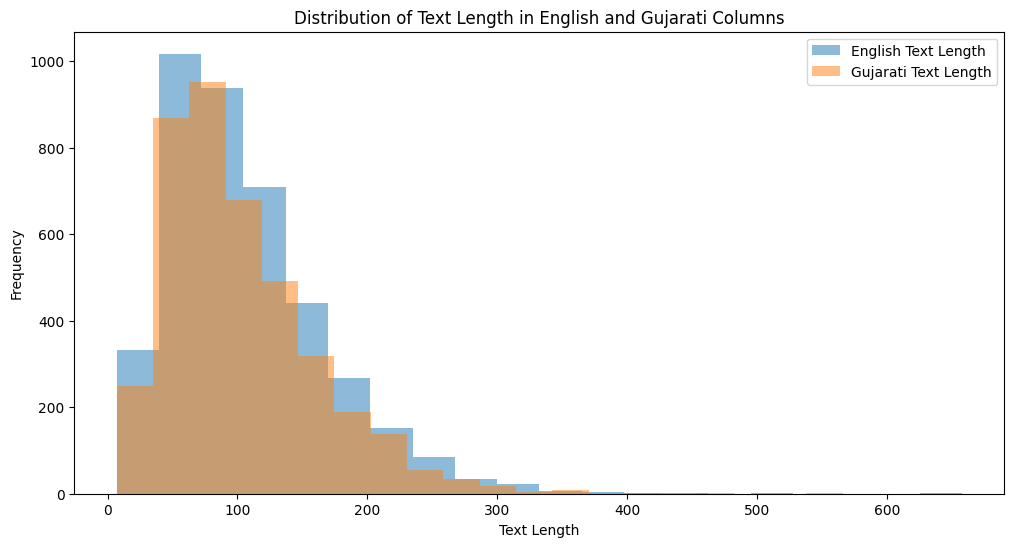

In [6]:
plt.figure(figsize=(12, 6))
plt.hist(df['English_length'], bins=20, alpha=0.5, label='English Text Length')
plt.hist(df['Gujarati_length'], bins=20, alpha=0.5, label='Gujarati Text Length')
plt.legend(loc='upper right')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length in English and Gujarati Columns')
plt.show()

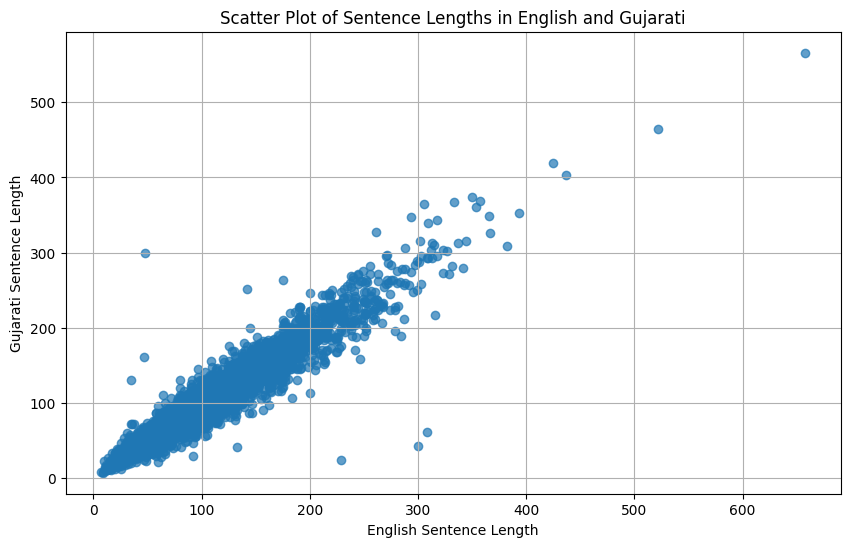

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['English_length'], df['Gujarati_length'], alpha=0.7)
plt.xlabel('English Sentence Length')
plt.ylabel('Gujarati Sentence Length')
plt.title('Scatter Plot of Sentence Lengths in English and Gujarati')
plt.grid(True)
plt.show()

In [8]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [9]:
from collections import Counter

# Function to tokenize and remove punctuation
def tokenize(text):
    return text.lower().split()

# Tokenize the English and Gujarati text
df['English_tokens'] = df['English'].apply(tokenize)
df['Gujarati_tokens'] = df['Gujarati'].apply(tokenize)

# Flatten the list of tokens and count word frequencies
english_words = [word for tokens in df['English_tokens'] for word in tokens]
gujarati_words = [word for tokens in df['Gujarati_tokens'] for word in tokens]

english_word_freq = Counter(english_words)
gujarati_word_freq = Counter(gujarati_words)

# Display the most common words in English
print("Most common words in English:")
print(english_word_freq.most_common(10))

# Display the most common words in Gujarati
print("Most common words in Gujarati:")
print(gujarati_word_freq.most_common(10))

Most common words in English:
[('the', 4625), ('to', 1933), ('of', 1848), ('a', 1679), ('in', 1639), ('and', 1591), ('that', 768), ('on', 750), ('is', 692), ('for', 652)]
Most common words in Gujarati:
[('અને', 1423), ('છે.', 1267), ('કે', 959), ('છે', 804), ('આ', 687), ('માટે', 654), ('પર', 636), ('તે', 627), ('એક', 596), ('પણ', 395)]
